# 基于SMOTE和Random Forest的信用卡欺诈识别

## 王一颉 201737005； 马昊腾 201737009

# A 导入与读取 

### A.1 主要包的导入

In [6]:
#导入主要包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter

### A.2 数据读取 

In [8]:
#数据集读取
df = pd.read_csv(r'C:\Users\Fritz-wang\Desktop\creditcard.csv')

### A.3 其它处理 

In [9]:
#控制警告输出
import warnings
warnings.filterwarnings("ignore")

# B 概览

### B.1 描述性统计 

In [10]:
#数据框行列数
df.shape

(284807, 31)

In [11]:
#描述性统计
df.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### B.2 相关系数
#### B.2.1 总体概览

In [12]:
#df.corr()#pearson相关系数
#df.corr('kendall')#kendall相关系数
#df.corr('spearman')#spearman相关系数
corr = df.corr()
corr#相关系数矩阵

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


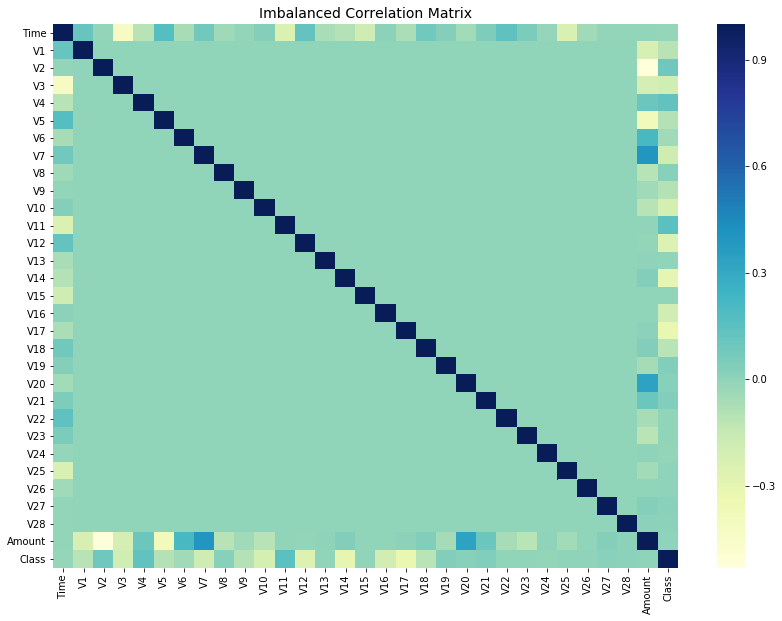

In [13]:
# 相关系数热图
f,ax= plt.subplots(1,1,figsize=(14,10))
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':20}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

#### B.2.2 变量间相关性分析

In [14]:
#相关系数排序
corr["Class"].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

In [15]:
#检验相关系数是否显著
for V in df['V10'],df['V12'],df['V14'],df['V17']:
    print(V.name,"'s corr test: ",stats.pearsonr(V,df['Class']))
for V in df['V2'],df['V4'],df['V11'],df['V21']:
    print(V.name,"'s corr test: ",stats.pearsonr(V,df['Class']))

V10 's corr test:  (-0.21688294364102964, 0.0)
V12 's corr test:  (-0.2605929248772196, 0.0)
V14 's corr test:  (-0.30254369580440726, 0.0)
V17 's corr test:  (-0.3264810672437176, 0.0)
V2 's corr test:  (0.09128865034462007, 0.0)
V4 's corr test:  (0.13344748623900587, 0.0)
V11 's corr test:  (0.15487564474394902, 0.0)
V21 's corr test:  (0.04041338061057598, 3.002268558443419e-103)


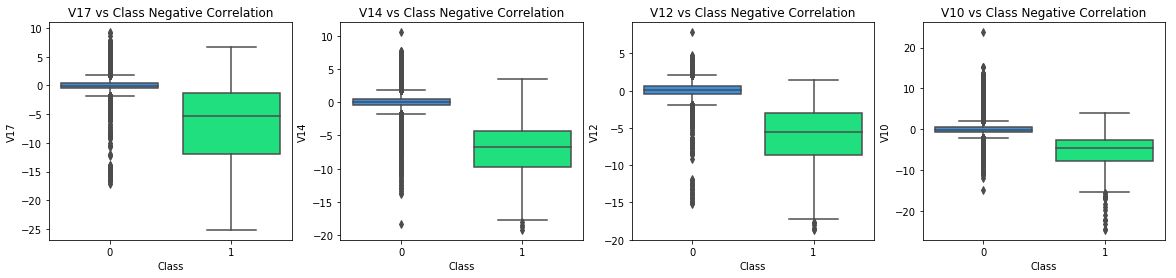

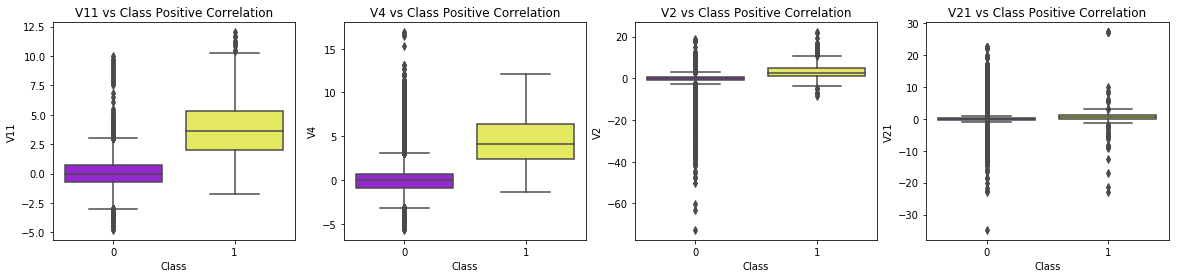

In [16]:
#变量间相关系数图
#负相关变量（颜色偏蓝）
colors = ["#1E90FF","#00FF7F"]
variable = ["V17","V14","V12","V10"]    
f,axes = plt.subplots(ncols=4,figsize=(20,4))
for v in range(4):
  sns.boxplot(x="Class", y=variable[v], data=df, palette=colors, ax=axes[v])
  axes[v].set_title(variable[v]+' vs Class Negative Correlation')
#正相关变量（颜色偏黄）
colors = ["#9A0EEA","#FAFE4B"]
variable = ["V11","V4","V2","V21"]    
f,axes = plt.subplots(ncols=4,figsize=(20,4))
for v in range(4):
  sns.boxplot(x="Class", y=variable[v], data=df, palette=colors, ax=axes[v])
  axes[v].set_title(variable[v]+' vs Class Positive Correlation')
plt.show()

### B.3 离散程度分析

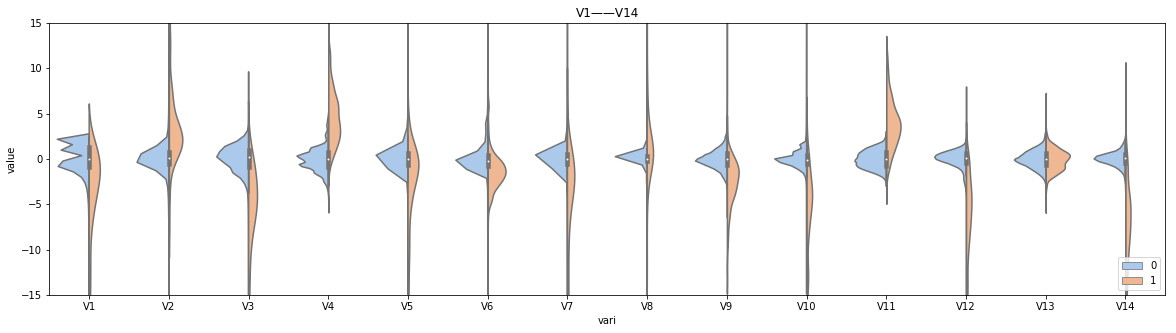

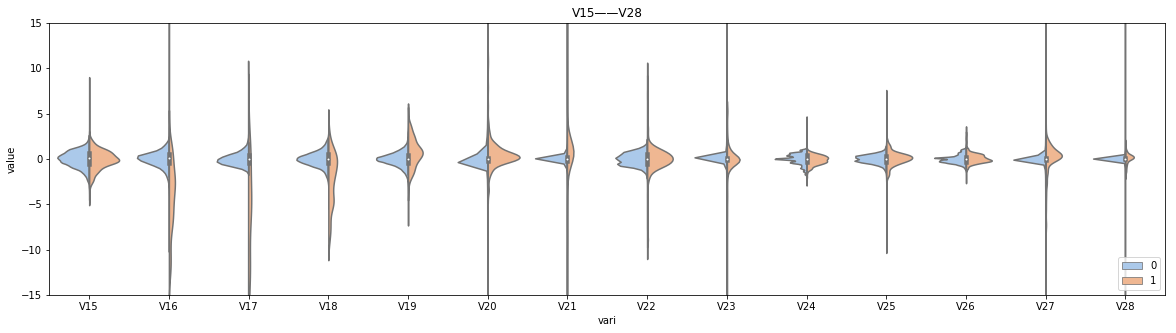

In [17]:
#V1——V28的离散程度琴型图
#V1——V14
df_c1 = df[["V1","Class"]]   
df_c1.rename(columns={"V1":"value", "Class":"Class"}, inplace = True)
df_c1["vari"]="V1"
for x in range(1,14):
    ndf = df[["V"+str(x+1),"Class"]]   
    ndf.rename(columns={"V"+str(x+1):"value", "Class":"Class"}, inplace = True)
    ndf["vari"]="V"+str(x+1)
    df_c1=pd.concat([df_c1,ndf]) 
#V15——V28
df_c2 = df[["V15","Class"]]   
df_c2.rename(columns={"V15":"value", "Class":"Class"}, inplace = True)
df_c2["vari"]="V15"
for x in range(15,28):
    ndf = df[["V"+str(x+1),"Class"]]   
    ndf.rename(columns={"V"+str(x+1):"value", "Class":"Class"}, inplace = True)
    ndf["vari"]="V"+str(x+1)
    df_c2=pd.concat([df_c2,ndf]) 
#绘图
plt.figure(figsize=(20,5))
plt.title('V1——V14')
sns.violinplot(x='vari',y='value',hue='Class',split=True,palette='pastel',data=df_c1)
plt.ylim([-15,15])
plt.legend(loc='lower right')
plt.show()
plt.figure(figsize=(20,5))
plt.title('V15——V28')
sns.violinplot(x='vari',y='value',hue='Class',split=True,palette='pastel',data=df_c2)
plt.ylim([-15,15])
plt.legend(loc='lower right')
plt.show()

# C 预处理

### C.1 缺失值处理 

In [18]:
#看有无缺失值
df_null=df.isnull()
print(df_null.sum())#无缺失值

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### C.2 标准化处理 

In [19]:
from sklearn import preprocessing

In [20]:
# C.2.1 Standardization
StandardScaler = preprocessing.StandardScaler()
ndf = StandardScaler.fit_transform(df[['Time','Amount']])#对time 和 amount 进行标准化处理
df.drop(['Time','Amount'], axis=1, inplace=True)#扔掉原来的
df = pd.concat([pd.DataFrame(ndf,columns=['Time','Amount']),df],axis=1)
df.head()
df[['Time','Amount']].head()
# C.2.2 Min_Max
#MinMaxScaler = preprocessing.MinMaxScaler()
#ndf = MinMaxScaler.fit_transform(df[['Time','Amount']])
#df.drop(['Time','Amount'], axis=1, inplace=True)#扔掉原来的
#df = pd.concat([pd.DataFrame(ndf,columns=['Time','Amount']),df],axis=1)
#df[['Time','Amount']].head()

,Time,Amount
0,-1.996583,0.244964
1,-1.996583,-0.342475
2,-1.996562,1.160686
3,-1.996562,0.140534
4,-1.996541,-0.073403


### C.3 离群值处理

In [21]:
# C.3.1 winsor处理法
#缩尾处理：观测数量不会受损
for COL in ["V10","V12","V14","V17"]:
    stats.mstats.winsorize(df[COL],limits=(0.01,0.01),inclusive=(True,True),inplace=True,axis=None)
for COL in ["V2","V4","V11","V21"]:
    stats.mstats.winsorize(df[COL],limits=(0.01,0.01),inclusive=(True,True),inplace=True,axis=None)
# C.3.2 箱线图 "上须" "下须" 处理法
#删尾处理：去除异常值
#for V in ["V10","V12","V14","V17"]:
#    p,q = np.percentile(df[V], 25), np.percentile(df[V], 75)
#    lower,upper = p-(q-p)*1.5, q+(q-p)*1.5
#    df=df[df[V].between(lower,upper)]
#for V in ["V2","V4","V11","V21"]:
#    p,q = np.percentile(df[V], 25), np.percentile(df[V], 75)
#    lower,upper = p-(q-p)*1.5, q+(q-p)*1.5
#    df=df[df[V].between(lower,upper)]
df[["V2","V4","V10","V11","V12","V14","V17","V21"]].describe(include="all")

,V2,V4,V10,V11,V12,V14,V17,V21
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.022670,-0.003695,-0.012003,-0.004202,0.006753,0.009163,0.006597,-0.006636
std,1.275831,1.370351,0.883448,0.987268,0.922414,0.843967,0.693969,0.416944
min,-4.960304,-3.122994,-2.092671,-2.093095,-3.063943,-2.799777,-1.349964,-1.469682
25%,-0.598550,-0.848640,-0.535426,-0.762494,-0.405571,-0.425574,-0.483748,-0.228395
50%,0.065486,-0.019847,-0.092917,-0.032757,0.140033,0.050601,-0.065676,-0.029450
75%,0.803724,0.743341,0.453923,0.739593,0.618238,0.493150,0.399675,0.186377
max,3.801831,4.248032,3.253624,2.290586,1.698602,2.150310,2.289940,1.931900


# D 划分数据集

In [22]:
is_FRAUD=df["Class"]#把不作处理列提取
INFO=df[list(df.columns)[:-1]]#要处理的部分

In [23]:
#数据集切分
from sklearn.model_selection import train_test_split
INFO_train,INFO_test,is_FRAUD_train,is_FRAUD_test = train_test_split(INFO,is_FRAUD,test_size=0.2,random_state=3)#random_state????#【调参】
INFO_train.shape,INFO_test.shape#看下各个集大小

((227845, 30), (56962, 30))

# E 采样 

### E.1 采样方法
#### E.1.1 上采样 (过采样) — SMOTE

In [24]:
#SMOTE
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=3)
INFO_smo, is_FRAUD_smo = smo.fit_sample(INFO_train, is_FRAUD_train)#X为特征，y为对应的标签
print("Fraud (Oversample) :","\n",Counter(is_FRAUD_smo))

Fraud (Oversample) : 
 Counter({0: 227453, 1: 227453})


#### E.1.2 下采样 (欠采样) — NearMiss

In [27]:
#NearMiss
from imblearn.under_sampling import NearMiss
near = NearMiss(version=2)
INFO_near, is_FRAUD_near = near.fit_sample(INFO_train, is_FRAUD_train)#X为特征，y为对应的标签
print("Fraud (Undersample) :","\n",Counter(is_FRAUD_near))

Fraud (Undersample) : 
 Counter({0: 392, 1: 392})


### E.2 采样可视化

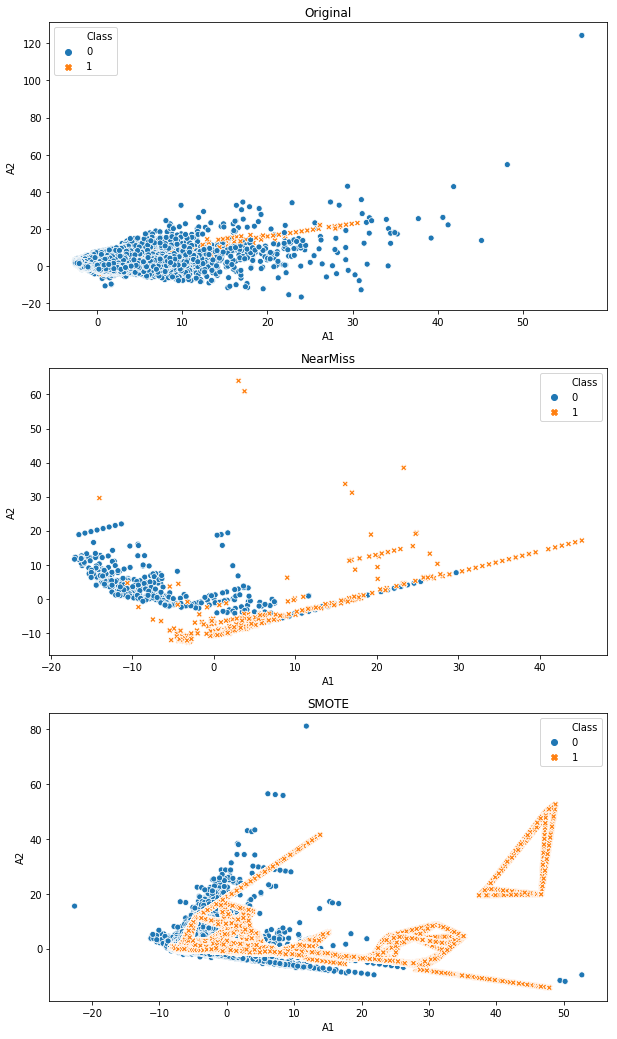

In [28]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
#采样前
INFO_train_vis=pca.fit_transform(INFO_train)#进行PCA处理便于绘图
a = pd.DataFrame(INFO_train_vis,columns=["A1","A2"])
b = pd.DataFrame(is_FRAUD_train.values,columns=["Class"])
df_vis_orig = pd.concat([a,b],axis=1)
df_vis_orig
#下采样
INFO_near_vis=pca.fit_transform(INFO_near)
a = pd.DataFrame(INFO_near_vis,columns=["A1","A2"])
b = pd.DataFrame(is_FRAUD_near,columns=["Class"])
df_vis_under = pd.concat([a,b],axis=1)
df_vis_under
#上采样
INFO_smo_vis=pca.fit_transform(INFO_smo)
a = pd.DataFrame(INFO_smo_vis,columns=["A1","A2"])
b = pd.DataFrame(is_FRAUD_smo,columns=["Class"])
df_vis_over = pd.concat([a,b],axis=1)
df_vis_over
#作图
f,axes = plt.subplots(nrows=3,figsize=(10,18))
sns.scatterplot(x="A1", y="A2",hue="Class", style="Class", data=df_vis_orig,ax=axes[0])
axes[0].set_title('Original')
sns.scatterplot(x="A1", y="A2",hue="Class", style="Class", data=df_vis_under,ax=axes[1])
axes[1].set_title('NearMiss')
sns.scatterplot(x="A1", y="A2",hue="Class", style="Class", data=df_vis_over,ax=axes[2])
axes[2].set_title('SMOTE')
plt.show()

# F 机器学习

### F.0 导入包

In [47]:
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imb_make_pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import average_precision_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix

### F.1 备选模型

#### [ 采样方法 ]
######   ·上采样  SMOTE
######   ·下采样  NearMiss
#### [ 算法 ]
######   · 算法 1 LogisiticRegression
######   · 算法 2 DecisionTree
######   · 算法 3 KNearest
######   · 算法 4 RandomForest

### F.2 模型比较 

#### F.2.1 COMPARE 1 ———— classification_report 【排除K近邻】

In [33]:
# 首先考虑五种分类器
classifiers = {
    'LogisiticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion="entropy", min_samples_split=3),
    'KNearest': KNeighborsClassifier(5, weights="distance"),
    'RandomForest': RandomForestClassifier(),
    #'XG': XGBClassifier(n_estimators=100,learning_rate= 0.3, max_depth=6, subsample=1, 
                        #gamma=0, reg_lambda=1,  max_delta_step=0,colsample_bytree=1, 
                       # min_child_weight=1, seed=1000, 
                        #reg_alpha=0, scale_pos_weight=1,objective= 'multi:softmax', 
                        #num_class=10,eval_metric= 'auc')
}

In [34]:
# 使用上采样后的数据训练五种模型的报告
for key, classifier in classifiers.items():
    smote_model = classifier.fit(INFO_smo, is_FRAUD_smo)
    smote_prediction = smote_model.predict(INFO_test)
    print(key, "SMOTE score:")
    #print(confusion_matrix(is_FRAUD_test, smote_prediction))
    print(classification_report(is_FRAUD_test, smote_prediction))
    print('----' * 20)

LogisiticRegression SMOTE score:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56862
           1       0.06      0.92      0.11       100

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

--------------------------------------------------------------------------------
DecisionTreeClassifier SMOTE score:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.46      0.78      0.58       100

    accuracy                           1.00     56962
   macro avg       0.73      0.89      0.79     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------------------------------------
KNearest SMOTE score:
              precision    recall  f1-score   support

           0       1.00      1.00     

In [35]:
#利用下采样后的数据进行训练报告
for key, classifier in classifiers.items():
    near_model = classifier.fit(INFO_near, is_FRAUD_near)
    near_prediction = near_model.predict(INFO_test)
    print(key, "NearMiss score:")
    #print(confusion_matrix(is_FRAUD_test, smote_prediction))
    print(classification_report(is_FRAUD_test, near_prediction))
    print('----' * 20)

LogisiticRegression NearMiss score:
              precision    recall  f1-score   support

           0       1.00      0.24      0.38     56862
           1       0.00      1.00      0.00       100

    accuracy                           0.24     56962
   macro avg       0.50      0.62      0.19     56962
weighted avg       1.00      0.24      0.38     56962

--------------------------------------------------------------------------------
DecisionTreeClassifier NearMiss score:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20     56862
           1       0.00      1.00      0.00       100

    accuracy                           0.11     56962
   macro avg       0.50      0.55      0.10     56962
weighted avg       1.00      0.11      0.20     56962

--------------------------------------------------------------------------------
KNearest NearMiss score:
              precision    recall  f1-score   support

           0       1.00      

#### F.2.2 COMPARE 2 ———— ROC 【排除决策树算法】

In [36]:
# 分类器，只保留表现比较好的三种
classifiers = {
    'LogisiticRegression': LogisticRegression(random_state = 3),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state = 3,criterion="entropy", min_samples_split=3),
    'RandomForest': RandomForestClassifier(random_state = 3)
}

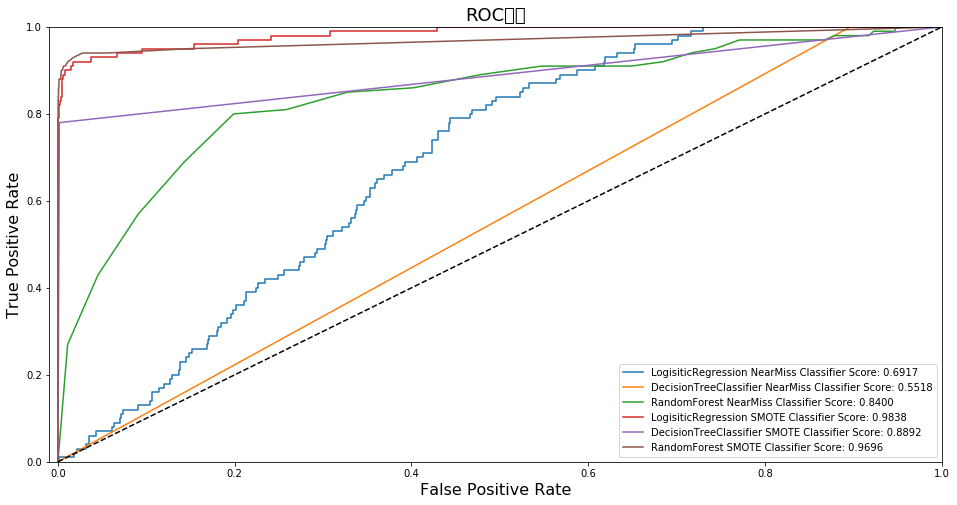

In [37]:
# 使用for循环绘制三种模型在两种采样方法中的ROC曲线，并计算AUC
plt.figure(figsize=(16,8))
plt.title('ROC曲线', fontsize=18)
for key, classifier in classifiers.items():#首先绘制下采样的曲线
    near_model = classifier.fit(INFO_near, is_FRAUD_near)
    near_prediction = near_model.predict_proba(INFO_test)[:,1]
    fpr, tpr, thresold = roc_curve(is_FRAUD_test, near_prediction)
    plt.plot(fpr, tpr, label='{} NearMiss Classifier Score: {:.4f}'.format(key,roc_auc_score(is_FRAUD_test, near_prediction)))
for key, classifier in classifiers.items():#再绘制上采样
    smote_model = classifier.fit(INFO_smo, is_FRAUD_smo)
    smote_prediction = smote_model.predict_proba(INFO_test)[:,1]
    fpr, tpr, thresold = roc_curve(is_FRAUD_test, smote_prediction)
    plt.plot(fpr, tpr, label='{} SMOTE Classifier Score: {:.4f}'.format(key,roc_auc_score(is_FRAUD_test, smote_prediction)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

#### F.2.3 COMPARE 3 ———— precision-recall-curve 【最后选出SMOTE+RandomForest模型】 

In [41]:
# 分类器，只保留两个
classifiers = {
    'LogisiticRegression': LogisticRegression(random_state = 3),
    'RandomForest': RandomForestClassifier(random_state = 3)
}

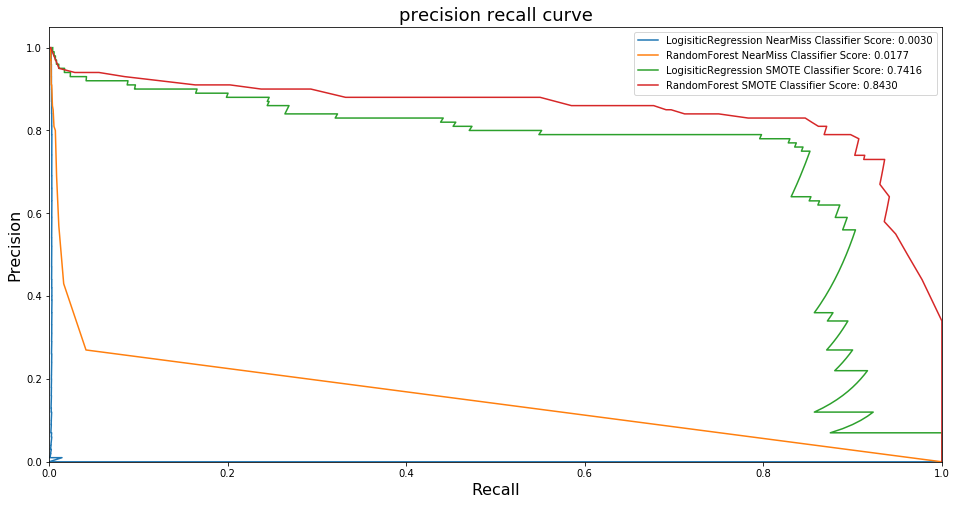

In [39]:
# precision-recall-curve，绘制方法与上同理，并计算average_precision_score
plt.figure(figsize=(16,8))
plt.title('precision recall curve', fontsize=18)
for key, classifier in classifiers.items():
    near_model = classifier.fit(INFO_near, is_FRAUD_near)
    near_score = near_model.predict_proba(INFO_test)[:,1]
    fpr, tpr, _ = precision_recall_curve(is_FRAUD_test, near_score)
    plt.plot(fpr, tpr, label='{} NearMiss Classifier Score: {:.4f}'.format(key,average_precision_score(is_FRAUD_test, near_score)))
for key, classifier in classifiers.items():
    smote_model = classifier.fit(INFO_smo, is_FRAUD_smo)
    smote_score = smote_model.predict_proba(INFO_test)[:,1]
    fpr, tpr, _ = precision_recall_curve(is_FRAUD_test, smote_score)
    plt.plot(fpr, tpr, label='{} SMOTE Classifier Score: {:.4f}'.format(key,average_precision_score(is_FRAUD_test, smote_score)))    
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# G SMOTE + RandomForest 模型

### G.1 调参

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# G.1.1 随机搜索法
rf_param = {"max_depth": [5,50, None],"n_estimators":range(10, 151, 10), "max_features": [5,10,15]}
cv_rf_clf = RandomizedSearchCV(RandomForestClassifier(), rf_param,scoring='f1_macro', n_iter=4)
ranmodel = cv_rf_clf.fit(INFO_smo, is_FRAUD_smo)
ranmodel.best_params_
#结果显示最优参数为n_estimators=140, max_depth = None,max_features = 5
# 参数代入模型



In [49]:
clf = RandomForestClassifier(n_estimators=140, max_depth = None,max_features = 5, random_state = 3)

### G.2 交叉验证

In [61]:
#不能先上采样再交叉验证，会导致数据溢出，需要在交叉验证过程中采样
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []
pipeline = imb_make_pipeline(SMOTE(random_state = 3), clf )#SMOTE + RF pipeline
sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train, test in sf.split(INFO_train,is_FRAUD_train):#使用for循环，在每次交叉验证中进行一次上采样
    model = pipeline.fit(INFO_train.iloc[train],is_FRAUD_train.iloc[train])
    prediction = model.predict(INFO_train.iloc[test])
    precision_lst.append(precision_score(is_FRAUD_train.iloc[test], prediction))
    recall_lst.append(recall_score(is_FRAUD_train.iloc[test], prediction))
    f1_lst.append(f1_score(is_FRAUD_train.iloc[test], prediction))
    auc_lst.append(roc_auc_score(is_FRAUD_train.iloc[test], prediction))
print("precision:",np.mean(precision_lst))#输出交叉验证结果
print("recall: ",np.mean(recall_lst))
print("f1: ",np.mean(f1_lst))
print('AUC: ',np.mean(auc_lst))

precision: 0.8912502759679416
recall:  0.8164881531970141
f1:  0.8515378117301369
AUC:  0.9081583446301116


### G.3 测试集测试——classification_report 

#### G.3.1 调参前模型 

In [51]:
#使用默认参数的RF模型
print("Random Forest SMOTE result:")
rf = RandomForestClassifier(random_state = 3)
m = rf.fit(INFO_smo, is_FRAUD_smo)
test_prediction1 = m.predict(INFO_test)#对测试集进行预测
print(classification_report(is_FRAUD_test, test_prediction1))

Random Forest SMOTE result:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.87      0.79      0.83       100

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



#### G.3.2 调参后模型 

In [53]:
#使用优化参数后的RF模型
print("Random Forest SMOTE result:")
pipeline = imb_make_pipeline(SMOTE(random_state = 3), clf )
model = pipeline.fit(INFO_train,is_FRAUD_train)
test_prediction = model.predict(INFO_test)
print(classification_report(is_FRAUD_test, test_prediction))

Random Forest SMOTE result:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.88      0.80      0.84       100

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### G.4 测试集测试——ROC曲线

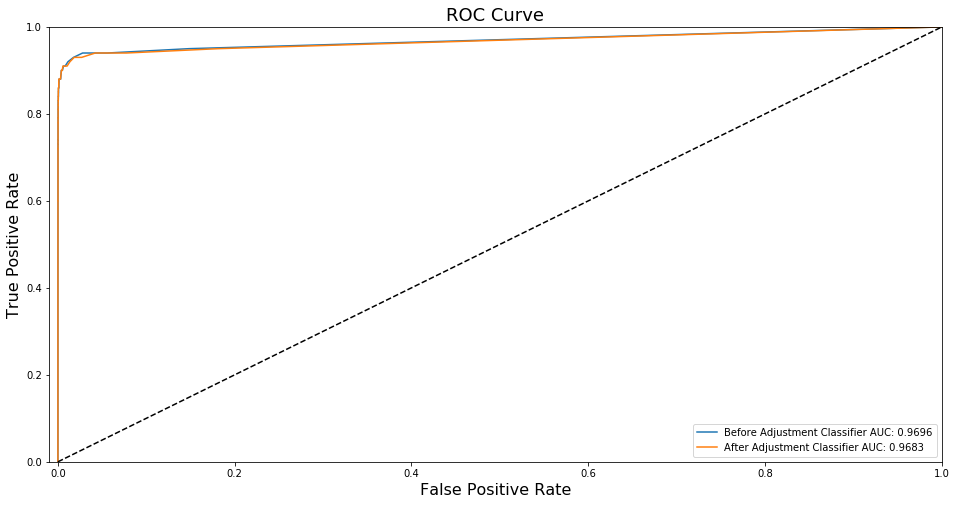

In [54]:
#分别绘制调参前后模型的ROC曲线，并计算AUC值
test_prediction_proba = model.predict_proba(INFO_test)[:,1]
test_prediction1_proba = m.predict_proba(INFO_test)[:,1]
plt.figure(figsize=(16,8))
plt.title('ROC Curve', fontsize=18)
fpr, tpr, thresold = roc_curve(is_FRAUD_test, test_prediction1_proba)
plt.plot(fpr, tpr, label='Before Adjustment Classifier AUC: {:.4f}'.format(roc_auc_score(is_FRAUD_test, test_prediction1_proba)))
fpr, tpr, thresold = roc_curve(is_FRAUD_test, test_prediction_proba)
plt.plot(fpr, tpr, label='After Adjustment Classifier AUC: {:.4f}'.format(roc_auc_score(is_FRAUD_test,test_prediction_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()#调参后AUC值略微下降

### G.5 测试集测试——precision-recall-curve

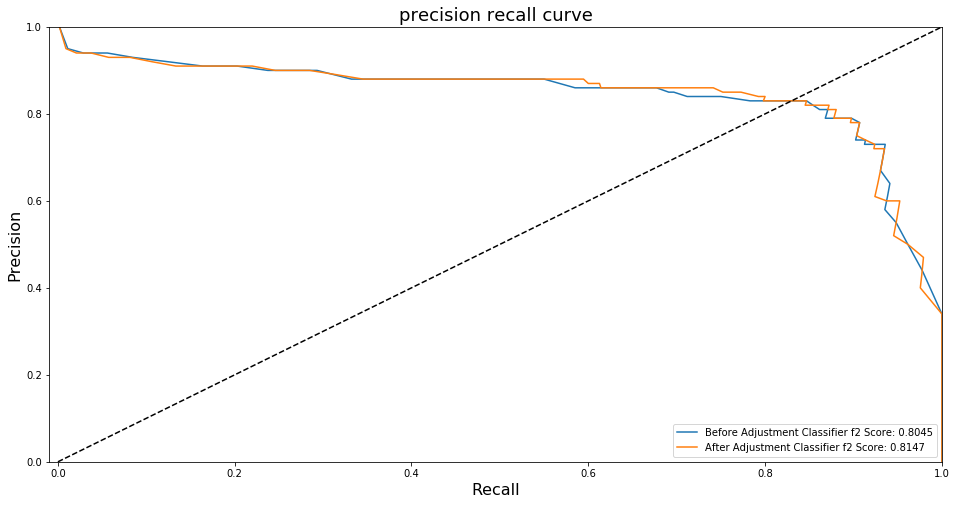

In [55]:
#分别绘制调参前后模型的PR曲线
plt.figure(figsize=(16,8))
plt.title('precision recall curve', fontsize=18)
fpr, tpr, _ = precision_recall_curve(is_FRAUD_test, test_prediction1_proba)
plt.plot(fpr, tpr, label='Before Adjustment Classifier f2 Score: {:.4f}'.format(fbeta_score(is_FRAUD_test, test_prediction1,2)))
fpr, tpr, _ = precision_recall_curve(is_FRAUD_test, test_prediction_proba)
plt.plot(fpr, tpr, label='After Adjustment Classifier f2 Score: {:.4f}'.format(fbeta_score(is_FRAUD_test, test_prediction,2)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend()
plt.show()#f2score提高了

### G.6 测试集测试——混淆矩阵

#### G.6.1 调参前模型

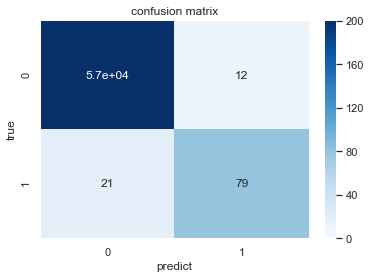

In [56]:
#混淆矩阵
sns.set()
f,ax=plt.subplots()
C=confusion_matrix(is_FRAUD_test, test_prediction1)
sns.heatmap(C,annot=True,vmax = 200, vmin=0, cmap=plt.cm.Blues)#由于测试集是不平衡的，为了让混淆矩阵颜色更清晰，将热力图的均值设为200
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴
plt.show()

#### G.6.2 调参后模型

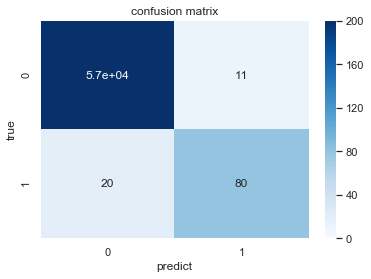

In [57]:
#混淆矩阵
sns.set()
f,ax=plt.subplots()
C=confusion_matrix(is_FRAUD_test, test_prediction)
sns.heatmap(C,annot=True,vmax = 200, vmin=0, cmap=plt.cm.Blues)
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴
plt.show()#第一类错误和第二类错误的数量减少了

### G.7 "下采样"后测试集————拟合效果分析分析

In [58]:
#由于测试集是不均衡的，因此我们对测试集进行采样后再进行测试
# 这里只使用调参后的模型进行分析
# G.7.1 测试集下采样
info_tenear, is_fraud_tenear = NearMiss().fit_sample(INFO_test, is_FRAUD_test)
t_prediction = model.predict(info_tenear)

In [59]:
# G.7.2 classification_report
print(classification_report(is_fraud_tenear, t_prediction))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       100
           1       0.99      0.80      0.88       100

    accuracy                           0.90       200
   macro avg       0.91      0.90      0.89       200
weighted avg       0.91      0.90      0.89       200



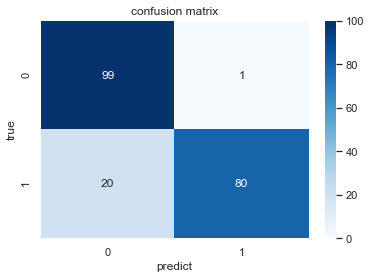

In [60]:
# G.7.3 混淆矩阵
sns.set()
f,ax=plt.subplots()
C=confusion_matrix(is_fraud_tenear, t_prediction)
sns.heatmap(C,annot=True,vmax = 100, vmin=0, cmap=plt.cm.Blues)
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴
plt.show()